In [7]:
import json
import requests
import numpy as np
import pandas as pd
import base64
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
import ipywidgets as widgets
from IPython.display import display
import re

In [2]:
#Falta sacar resultados de mas tiempo pendiente de ver como usar: #https://es.investing.com/equities/morehistory
#Crear linea de resultados esperados para poder comparar con resultados obtenidos
#Añadir en el grafico un segundo eje Y a la derecha con el volumen
#Ver que hacer con las unidades de Billions y Millions


## Web Scraping

In [10]:
url='https://investing.com/equities'
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

html=requests.get(url,headers=headers).content
soup=BeautifulSoup(html,'lxml')

table = soup.find_all('table',{'id':'cross_rate_markets_stocks_1'})

In [4]:
table2=table[0]

In [5]:
rows=table2.find_all('tr')
rows=rows[1:]

In [6]:
titles = [row.a.get('title') for row in rows]
links = [row.a.get('href') for row in rows]

Diccionario con todas las empresas del IBEX

In [7]:
dict_companies = { titles[i] : links[i] for i in range(len(titles)) }

In [48]:
companies_dropdown=widgets.Dropdown(options=titles,description='Company:')
companies_dropdown

Dropdown(description='Company:', options=('Chevron Corp', 'Citigroup Inc', 'Bank of America Corp', 'AT&T Inc',…

In [56]:
company_web=dict_companies.get(companies_dropdown.value)
company_web

'/equities/procter-gamble'

### CREAT WIDGET PARA SELECCIONAR EMPRESA DEL DICCIONARIO Y ASIGNAR A UNA VARIABLE

In [57]:
#Publicacion resultados: https://es.investing.com/equities/apple-computer-inc-earnings
url=f'https://investing.com{company_web}-earnings'
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

#https://es.investing.com/equities/morehistory

html=requests.get(url,headers=headers).content
soup=BeautifulSoup(html,'lxml')

In [58]:
table = soup.find_all('table',{'class':'genTbl openTbl ecoCalTbl earnings earningsPageTbl'})

In [59]:
name_api = soup.find_all('h1',{'class':'float_lang_base_1 relativeAttr'})
name_api = soup.find_all('h1',{'class':'float_lang_base_1 relativeAttr'})
name_api

[<h1 class="float_lang_base_1 relativeAttr" dir="ltr" itemprop="name">Procter &amp; Gamble Company (PG)	</h1>]

In [60]:
name_api = soup.find_all('h1',{'class':'float_lang_base_1 relativeAttr'})
name_api = name_api[0].text.strip().split('\n')
name_api=re.findall('\((.*)\)',name_api[0])
name_api=name_api[0]
name_api

'PG'

In [61]:
table2=table[0]

In [62]:
rows=table2.find_all('tr')
rows = [row.text.strip().split('\n') for row in rows]
rows =[list(filter(None,row)) for row in rows]

In [63]:
colnames = ['Date_publish','Period','BPA','PrevBPA','Revenue','PrevRevenue']
datos=rows
df=pd.DataFrame(datos[2:], columns=colnames)
df

,Date_publish,Period,BPA,PrevBPA,Revenue,PrevRevenue
0,"Jan 23, 2020",12/2019,1.42,/ 1.21,18.24B,"/ 17,147M"
1,"Oct 22, 2019",09/2019,1.37,/ 1.24,17.8B,/ 17.45B
2,"Jul 30, 2019",06/2019,1.1,/ 1.05,17.09B,/ 16.86B
3,"Apr 23, 2019",03/2019,1.06,/ 1.03,16.46B,/ 16.36B
4,"Jan 23, 2019",12/2018,1.25,/ 1.21,17.44B,/ 17.16B


In [64]:
df['Date_publish']=pd.to_datetime(df['Date_publish']).dt.date
df['Period']='30/'+df['Period']
df['Period']=pd.to_datetime(df['Period']).dt.date
df=df.replace('[,]', '.', regex=True)
df['PrevBPA']=df['PrevBPA'].replace('/', '', regex=True)
df['Revenue']=df['Revenue'].replace('[A-Z]', '', regex=True).astype(float)
df['PrevRevenue']=df['PrevRevenue'].replace('/', '', regex=True)
df['PrevRevenue']=df['PrevRevenue'].replace('[A-Z]', '', regex=True).astype(float)
df

,Date_publish,Period,BPA,PrevBPA,Revenue,PrevRevenue
0,2020-01-23,2019-12-30,1.42,1.21,18.24,17.147
1,2019-10-22,2019-09-30,1.37,1.24,17.80,17.450
2,2019-07-30,2019-06-30,1.1,1.05,17.09,16.860
3,2019-04-23,2019-03-30,1.06,1.03,16.46,16.360
4,2019-01-23,2018-12-30,1.25,1.21,17.44,17.160


### API

In [65]:
#https://financialmodelingprep.com/developer/docs/companies-key-stats-free-api/#Python

#'https://financialmodelingprep.com/api/v3/historical-price-full/AAPL'


url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{name_api}'
response = requests.get(url)



In [66]:
result=response.json()
result
data=pd.DataFrame(json_normalize(result))

In [67]:
#data['historical'][0]

In [68]:
data2=json_normalize(data['historical'][0])
data2

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2015-02-17,86.06,86.06,85.00,85.49,74.01,10310400.0,10310400.0,0.57,0.662,85.51667,"February 17, 15",0.00662
1,2015-02-18,85.76,86.39,85.52,86.26,74.68,8132300.0,8132300.0,-0.50,-0.583,86.05667,"February 18, 15",-0.00583
2,2015-02-19,86.11,86.30,85.05,85.21,73.77,7271600.0,7271600.0,0.90,1.045,85.52000,"February 19, 15",0.01045
3,2015-02-20,84.95,85.05,84.19,84.87,73.47,9581300.0,9581300.0,0.08,0.094,84.70333,"February 20, 15",0.00094
4,2015-02-23,84.96,85.50,84.65,85.39,73.92,7919200.0,7919200.0,-0.43,-0.506,85.18000,"February 23, 15",-0.00506
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-02-10,126.46,126.83,125.76,126.17,126.17,5216100.0,5216100.0,0.29,0.229,126.25333,"February 10, 20",0.00229
1255,2020-02-11,126.27,126.27,124.03,124.16,124.16,6105700.0,6105700.0,2.11,1.671,124.82000,"February 11, 20",0.01671
1256,2020-02-12,123.68,123.97,122.85,123.45,123.45,6031700.0,6031700.0,0.23,0.186,123.42333,"February 12, 20",0.00186
1257,2020-02-13,123.73,125.28,123.52,124.96,124.96,7159000.0,7159000.0,-1.23,-0.994,124.58667,"February 13, 20",-0.00994


In [69]:
data3=data2[['date','open','close','volume','change','changePercent','vwap']]
data3['date']=pd.to_datetime(data3['date']).dt.date

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
data3.head(5)

,date,open,close,volume,change,changePercent,vwap
0,2015-02-17,86.06,85.49,10310400.0,0.57,0.662,85.51667
1,2015-02-18,85.76,86.26,8132300.0,-0.50,-0.583,86.05667
2,2015-02-19,86.11,85.21,7271600.0,0.90,1.045,85.52000
3,2015-02-20,84.95,84.87,9581300.0,0.08,0.094,84.70333
4,2015-02-23,84.96,85.39,7919200.0,-0.43,-0.506,85.18000


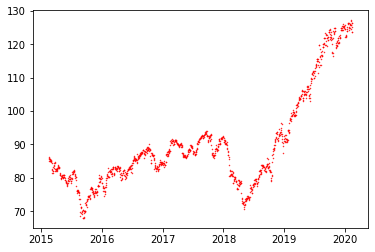

In [71]:
plt.scatter(data3['date'], data3['open'], s =0.2, c = 'red')

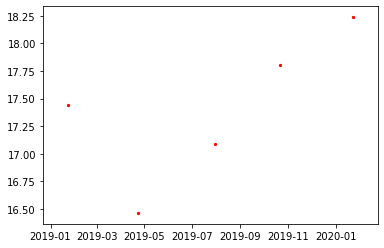

In [72]:
plt.scatter(df['Date_publish'], df['Revenue'], s =5, c = 'red')

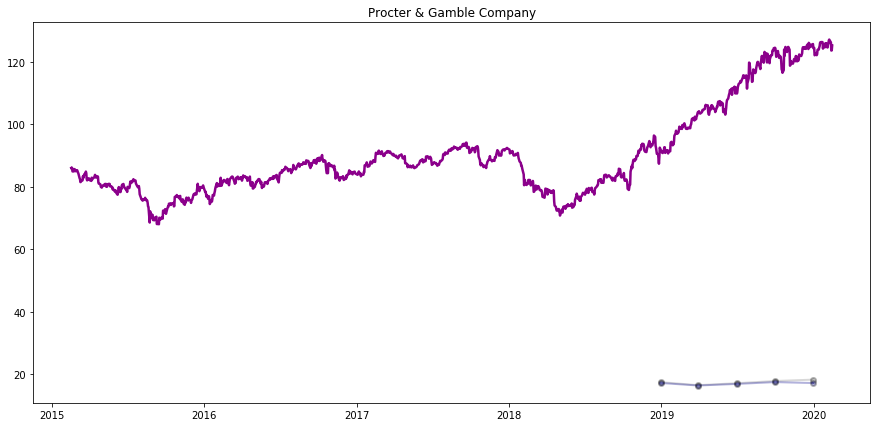

In [73]:
# Requirement 1
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(15,7),subplot_kw = {'title' :companies_dropdown.value})


ax.plot(data3.date,data3.open,
       linewidth=2.5,color='darkmagenta',label=2014)


ax.plot(df.Period,df.Revenue,
        linewidth=2,
       color='grey',
       alpha=0.3,
        marker = 'o', 
        markersize = 5,
        markeredgecolor = 'black',
        markeredgewidth = 2)

ax.plot(df.Period,df.PrevRevenue,
        linewidth=2,
       color='darkblue',
       alpha=0.3,
        marker = 'o', 
        markersize = 5,
        markeredgecolor = 'black',
        markeredgewidth = 2)


In [70]:
import time
from selenium import webdriver

driver = webdriver.Chrome('/Users/inesgalofrebofill/Documents/Ironhack/chromedriver')  # Optional argument, if not specified will search path.
driver.get('https://www.investing.com/equities/google-inc-earnings');
time.sleep(2) # Let the user actually see something!
search_box = driver.find_elements_by_id('showMoreEarningsHistory')[0]
search_box.click()
time.sleep(2)
search_box.click()
time.sleep(2)
search_box.click()
time.sleep(2)
search_box.click()

#html=driver.page_source
time.sleep(2)
df = pd.read_html(driver.page_source)[0]


#url='https://investing.com/equities'
#headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

#html=requests.get(url,headers=headers).content
'''table = driver.find_element_by_id('earningsHistory6369')
table.get_attribute()
table=table.text
print(table)
colnames = ['Date_publish','Period','BPA','PrevBPA','Revenue','PrevRevenue']
datos=list(table)
df=pd.DataFrame(datos)
print(df)'''


#table = soup.find_all('table',{'class':'genTbl openTbl ecoCalTbl earnings earningsPageTbl'})
#soup=BeautifulSoup(html,'lxml')
#print(soup)
#table = soup.find_all('table',{'id':'cross_rate_markets_stocks_1'})

#table2=table[0]

#rows=table2.find_all('tr')
#rows=rows[1:]


#print(rows)



time.sleep(5) # Let the user actually see something!
driver.quit()


In [71]:
df

,Release Date,Period End,EPS,/ Forecast,Revenue,/ Forecast.1
0,"Apr 22, 2020",03/2020,--,/ 12.15,--,/ 42.92B
1,"Feb 03, 2020",12/2019,15.35,/ 12.49,46.08B,/ 46.93B
2,"Oct 28, 2019",09/2019,10.12,/ 12.32,40.5B,/ 40.31B
3,"Jul 25, 2019",06/2019,14.21,/ 11.1,38.94B,/ 38.15B
4,"Apr 29, 2019",03/2019,9.5,/ 10.6,36.34B,/ 37.3B
5,"Feb 04, 2019",12/2018,12.77,/ 10.88,39.28B,/ 38.91B
6,"Oct 25, 2018",09/2018,13.06,/ 10.41,33.74B,/ 33.61B
7,"Jul 23, 2018",06/2018,11.75,/ 9.64,32.66B,/ 25.58B
8,"Apr 23, 2018",03/2018,13.33,/ 9.28,31.15B,/ 24.86B
9,"Feb 01, 2018",12/2017,9.70,/ 9.98,32.32B,"/ 31,867M"


In [56]:
dir(table)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_execute',
 '_id',
 '_parent',
 '_upload',
 '_w3c',
 'clear',
 'click',
 'find_element',
 'find_element_by_class_name',
 'find_element_by_css_selector',
 'find_element_by_id',
 'find_element_by_link_text',
 'find_element_by_name',
 'find_element_by_partial_link_text',
 'find_element_by_tag_name',
 'find_element_by_xpath',
 'find_elements',
 'find_elements_by_class_name',
 'find_elements_by_css_selector',
 'find_elements_by_id',
 'find_elements_by_link_text',
 'find_elements_by_name',
 'find_elements_by_partial_link_text',
 'find_elements_by_tag_name',
 'find_elements_by_xpath',
 'get_attribute',
 'get_property',
 'id',
 